In [0]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from google.colab import files
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [5]:
uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving part-00001-ea764dcd-7d97-4606-b732-aca471c0873c-c000.csv to part-00001-ea764dcd-7d97-4606-b732-aca471c0873c-c000.csv
User uploaded file "part-00001-ea764dcd-7d97-4606-b732-aca471c0873c-c000.csv" with length 9844560 bytes


In [0]:
df = pd.read_csv("part-00001-ea764dcd-7d97-4606-b732-aca471c0873c-c000.csv", names=["app_id", "ad_id", 'platform', 'latitude', 'longitude', 'horizontal_accuracy', 'location_at', 'email', 'ipv_4', 'user_agent', 'country', 'battery', 'background', 'network', 'venue_name', 'venue_category', 'vertical_accuracy', 'speed', 'heading', 'publisher_id', 'dwell_time', 'person_id', 'client_id', 'sdk_version', 'altitude', 'ipv_6', 'mobile_number', 'captured_at', 'created_at', 'floor', 'carrier', 'manufacturer', 'device_model', 'wifi_ssid', 'wifi_bssid', 'decorated_at', 'dist_moved', 'day_number', 'day_type', 'time_type', 'dwell_type', 'confidence', 'brand_name', 'source', 'tech_signals', 'geo_country', 'misc'])

In [0]:
clustering = df[["horizontal_accuracy", "speed", "heading"]]
clustering = clustering[clustering["horizontal_accuracy"] < 50]
#clustering = clustering[clustering["speed"]]
clustering["speed"] = clustering["speed"].apply(lambda x: 0 if x < 0 else x)

In [0]:
#clustering.dropna(inplace=True)
clustering["horizontal_accuracy"].fillna(clustering["horizontal_accuracy"].mean(), inplace=True)
clustering["speed"].fillna(clustering["speed"].mean(), inplace=True)
clustering["heading"].fillna(clustering["heading"].mean(), inplace=True)

In [10]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(clustering)
print(kmeans.labels_)
print(kmeans.cluster_centers_)

[1 0 1 ... 1 0 1]
[[  9.78733338  15.87703134 169.14979498]
 [  9.42055117  16.46692983 292.29672185]
 [ 13.94261692  13.03729539  39.44623451]]


In [0]:
clustering["label"] = kmeans.labels_

In [17]:
clustering["label"].value_counts()

2    6634
1    6226
0    5910
Name: label, dtype: int64

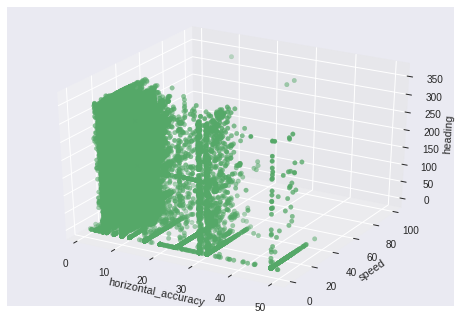

In [20]:
centroids = kmeans.cluster_centers_
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker='x')
ax.scatter(clustering["horizontal_accuracy"], clustering["speed"], clustering["heading"])
ax.set_xlabel("horizontal_accuracy")
ax.set_ylabel("speed")
ax.set_zlabel("heading")
plt.show()

In [21]:
reduced_data = PCA(n_components=2).fit_transform(clustering.loc[:, clustering.columns != "label"])
kmeans = KMeans(n_clusters=3)
kmeans.fit(reduced_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [23]:
kmeans2 = KMeans(n_clusters=3, random_state=0).fit(clustering[["horizontal_accuracy", "speed"]])
clustering["labels"] = kmeans2.labels_
print(clustering["labels"].value_counts())
print(kmeans2.cluster_centers_)

0    8693
1    7782
2    2295
Name: labels, dtype: int64
[[ 8.18511884  9.19676831]
 [ 8.36035469 23.82534747]
 [31.70259416  7.56289753]]


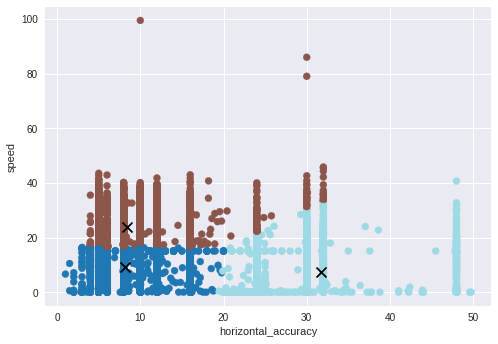

In [25]:
centroids = kmeans2.cluster_centers_
plt.scatter(clustering["horizontal_accuracy"], clustering["speed"], c=clustering["labels"], cmap='tab20')
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='black', marker='x')
plt.xlabel("horizontal_accuracy")
plt.ylabel("speed")
plt.show()